# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [46]:
import pandas as pd

# 1. Загрузка данных
df = pd.read_csv('play2024.csv')
print(df.head())


                                             img                        title  \
0  /games/boxart/full_6510540AmericaFrontccc.jpg           Grand Theft Auto V   
1  /games/boxart/full_5563178AmericaFrontccc.jpg           Grand Theft Auto V   
2                    /games/boxart/827563ccc.jpg  Grand Theft Auto: Vice City   
3  /games/boxart/full_9218923AmericaFrontccc.jpg           Grand Theft Auto V   
4  /games/boxart/full_4990510AmericaFrontccc.jpg    Call of Duty: Black Ops 3   

  console    genre       publisher       developer  critic_score  total_sales  \
0     PS3   Action  Rockstar Games  Rockstar North           9.4        20.32   
1     PS4   Action  Rockstar Games  Rockstar North           9.7        19.39   
2     PS2   Action  Rockstar Games  Rockstar North           9.6        16.15   
3    X360   Action  Rockstar Games  Rockstar North           NaN        15.86   
4     PS4  Shooter      Activision        Treyarch           8.1        15.09   

   na_sales  jp_sales  pal

In [50]:
print(df.columns.tolist())


['img', 'title', 'console', 'genre', 'publisher', 'developer', 'critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales', 'release_date', 'last_update']


In [51]:
## КОПИЯ оригинального датафрейма
from sklearn.preprocessing import LabelEncoder

data = df.copy()

# Удалим строки с пропущенными значениями в ключевых признаках
data = data.dropna(subset=['genre', 'console', 'publisher', 'critic_score', 'total_sales'])

# Категориальные признаки -> числовые через Label Encoding
label_encoders = {}
for col in ['genre', 'console', 'publisher']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Удалим лишние столбцы
data_model = data[['console', 'genre', 'publisher', 'critic_score', 'total_sales']]

# Посмотрим итоговые данные
data_model.head()



,console,genre,publisher,critic_score,total_sales
0,14,0,151,9.4,20.32
1,15,0,151,9.7,19.39
2,13,0,151,9.6,16.15
4,15,15,13,8.1,15.09
5,24,15,13,8.7,14.82


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Разделение признаков и цели
X = data_model.drop('total_sales', axis=1)
y = data_model['total_sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Линейная регрессия
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Случайный лес
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Метрики
print("Linear Regression:")
print("  MSE:", mean_squared_error(y_test, y_pred_lr))
print("  R²:", r2_score(y_test, y_pred_lr))

print("\nRandom Forest:")
print("  MSE:", mean_squared_error(y_test, y_pred_rf))
print("  R²:", r2_score(y_test, y_pred_rf))



Linear Regression:
  MSE: 2.128229566110691
  R²: 0.10220408757484212

Random Forest:
  MSE: 1.642971067864401
  R²: 0.306910902634863


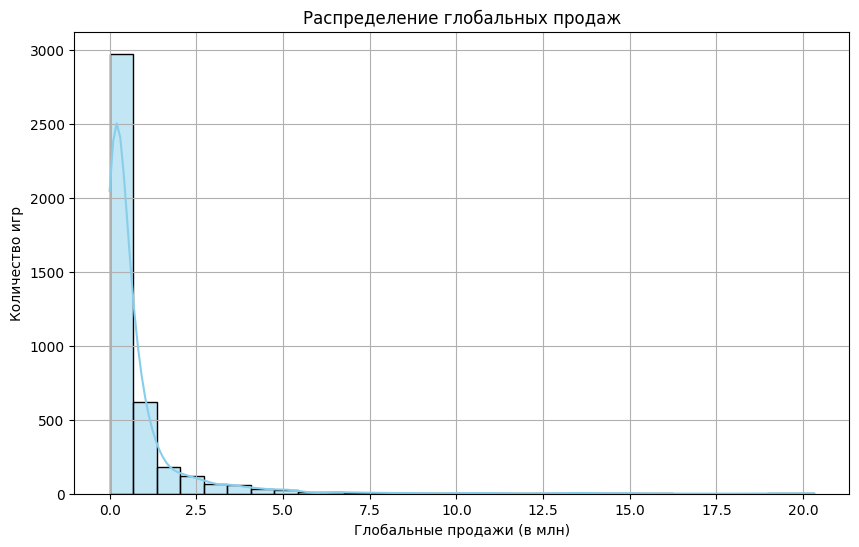

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['total_sales'], bins=30, kde=True, color='skyblue')
plt.title('Распределение глобальных продаж')
plt.xlabel('Глобальные продажи (в млн)')
plt.ylabel('Количество игр')
plt.grid(True)
plt.show()


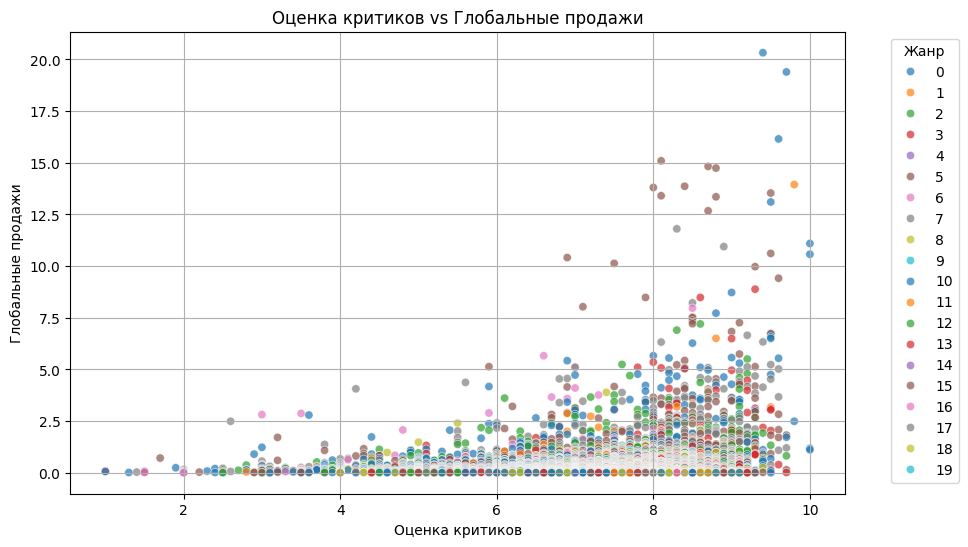

In [55]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='critic_score', y='total_sales', data=data, hue='genre', palette='tab10', alpha=0.7)
plt.title('Оценка критиков vs Глобальные продажи')
plt.xlabel('Оценка критиков')
plt.ylabel('Глобальные продажи')
plt.legend(title='Жанр', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


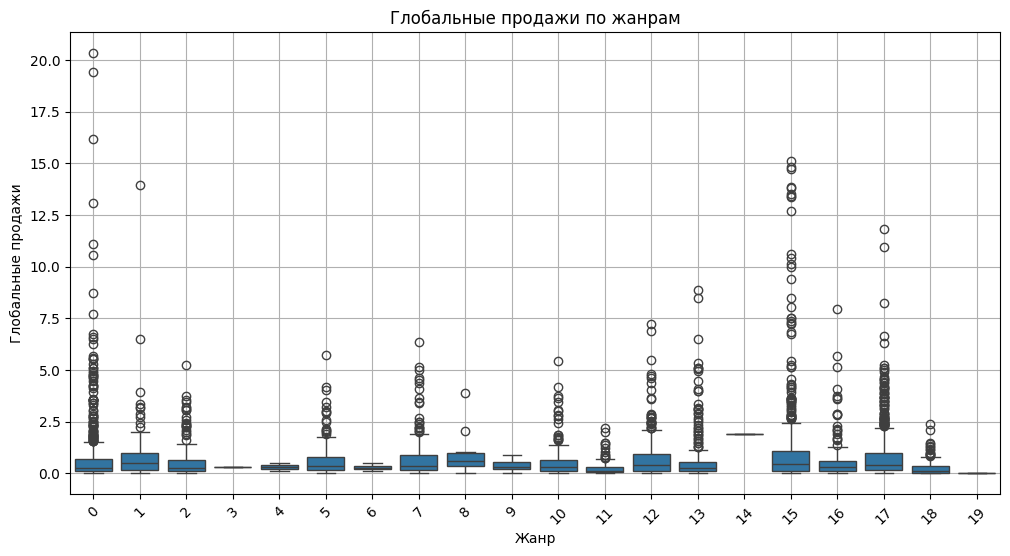

In [56]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='genre', y='total_sales')
plt.title('Глобальные продажи по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Глобальные продажи')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


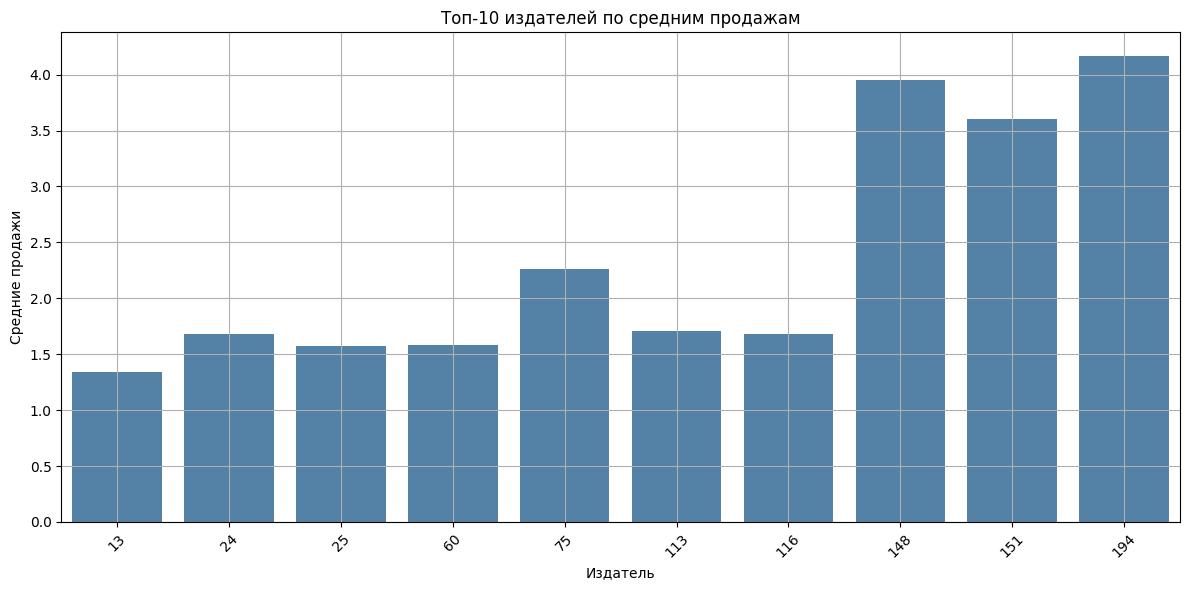

In [58]:
top_publishers = data.groupby('publisher')['total_sales'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_publishers.index, y=top_publishers.values, color='steelblue')
plt.title('Топ-10 издателей по средним продажам')
plt.ylabel('Средние продажи')
plt.xlabel('Издатель')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
